In [77]:
# Name: Mustafa
# Surname: Bayrak
# ID: 150210339

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm, expon, rayleigh, uniform, poisson, geom
%matplotlib inline
# do not include any other libraries


seed = 1881
n_trials = 100
np.random.seed(seed)

## Random Number Generator with Cauchy Distribution [18pts]

In this part you will implement a random number generator class.

The Probablity Density Function of Cauchy Distribution:
$$
\frac{1}{\pi \gamma\left[1+\left(\frac{x-x_0}{\gamma}\right)^2\right]}
$$
Here $\gamma$ is the scale parameter where $x_0$ is the starting location. 

The Cumulative Distribution Function of Cauchy Distribution:
$$
F(x)=\int_{-\infty}^{x} f(u) \mathrm{d} u= \frac{1}{\pi} \arctan \left(\frac{x-x_0}{\gamma}\right)+\frac{1}{2}
$$

* Your **RandomNumberGenerator** class will be initialized with $x_0$, $\gamma$, and a $domain$.
* **[5pts]** The class must have a pdf function that takes **x** and return the pmf value. **x** could be int, float, list or numpy.ndarray
* **[5pts]** The class must have a cdf function that takes **x** and return the cmf value. **x** could be int, float, list or numpy.ndarray
* **[7pts]** The class must have a randint function. In randint function you will use the cdf. The procedure can be described as follows;
*    1. You will sample a float value called $n$ from uniform distribution $U(0, 1)$
*    2. Search in the CDF and find the last value smaller than $n$.
*    3. Corresponding value of the index of the $domain$ will be the generated integer.
* **[1pts]** The class must have a \_\_str\_\_ function that returns a string in the format "RandomNumberGenerator({self.b})".

In [79]:
class RandomNumberGenerator:
     # Initialized with x0, gamma, domain
    def __init__(self, x0, gamma, domain):
        self.x0 = x0
        self.gamma = gamma
        self.domain = domain
    
    def pdf(self, x):
        # Use equation to find result
        result = 1 / ((float(np.pi) * float(self.gamma))*(1 + ((x-self.x0)/float(self.gamma))**2))
        # Return result
        return result
    
    def cdf(self, x):
        # Use equation to find result
        result = ((1/ float(np.pi)) * np.arctan((x - float(self.x0))/float(self.gamma))) + 1/2
        # Return result
        return result
    
    def randint(self):
        #  Sample a float value called 𝑛 from uniform distribution 𝑈(0,1)
        n = np.random.uniform(0,1)
        # Call cdf values
        cdf_vals = self.cdf(self.domain)
        # Declare a list to store smaller values
        min_lst = []
        # Iterate in cdf_vals list
        for i in range(len(cdf_vals)):
            if cdf_vals[i] < n:
                # If element is smaller then n, append to list
                min_lst.append([cdf_vals[i],i])
        # If min_lst is not empty
        if min_lst:
            # result is the greatest element in the list
            result = self.domain[max(min_lst, key=lambda x: x[0])[1]]
        else:
            # If list is empty, result equals last element of domain list
            result = domain[-1]
        # Return result
        return result
    
    def __str__(self):
        return f"RandomNumberGenerator({self.x0},{self.gamma})"
    

**plot_part1:** is a helper function to plot your results. Please do not change it. It takes title, pdf, cdf, mean and standard deviation of numbers (generated numbers), domain.

In [80]:
def plot_part1(title, pdf, cdf, mean, std, domain):
    plt.figure(figsize=(20,4))
    plt.suptitle(title)
    plt.subplot(1,4,1)
    plt.plot(domain, pdf)
    plt.title("PDF")
    plt.ylabel("$p(x)$")
    plt.xlabel("$x$")
    plt.grid()
    plt.subplot(1,4,2)
    plt.plot(domain, cdf)
    plt.title("CDF")
    plt.ylabel("$F(x)$")
    plt.xlabel("$x$")
    plt.grid()
    plt.subplot(1,4,3)
    plt.plot([item for item in range(1, n_trials + 1)], mean)
    plt.title("Mean of Generated Integers")
    plt.ylabel("Mean")
    plt.xlabel("Trial Number")
    plt.ylim(-25, 25)
    plt.grid()
    plt.subplot(1,4,4)
    plt.plot([item for item in range(1, n_trials + 1)], std)
    plt.title("Standard Deviation of Generated Integers")
    plt.ylabel("Standard Deviation")
    plt.xlabel("Trial Number")
    plt.ylim(-25, 25)
    plt.grid()
    plt.show()

### Play Time [2pts]
Now let's see how our generator works. Generate different RandomNumberGenerator's and plot them.

Use $\{-5, 0, 5\}$ for **$x_0$**.

Use $\{1, 5, 10\}$ for *$\gamma$*.


Use np.linspace(-20, 20, 21, dtype=np.int64) for **domain**.

You will plot 9 plots. Please use **plot_part1** and as a title must be in the format of "RandomNumberGenerator($x_0$,$\gamma$)".

You need to generate a list of random integers with using **RandomNumberGenerator.randint()**. Size of the list must be **n_trials**.

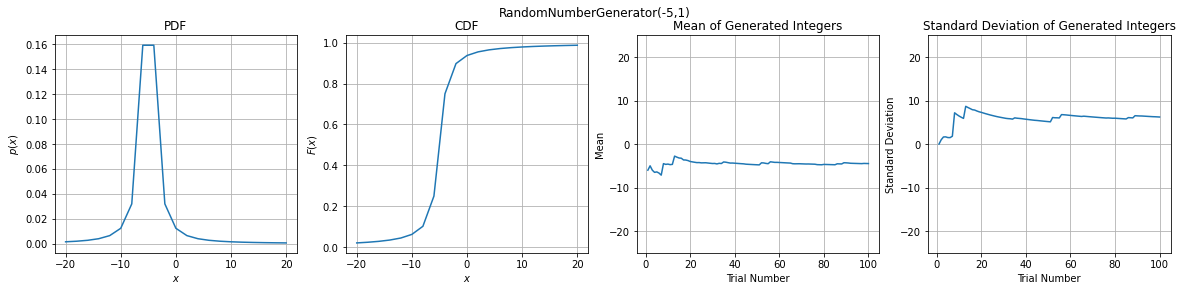

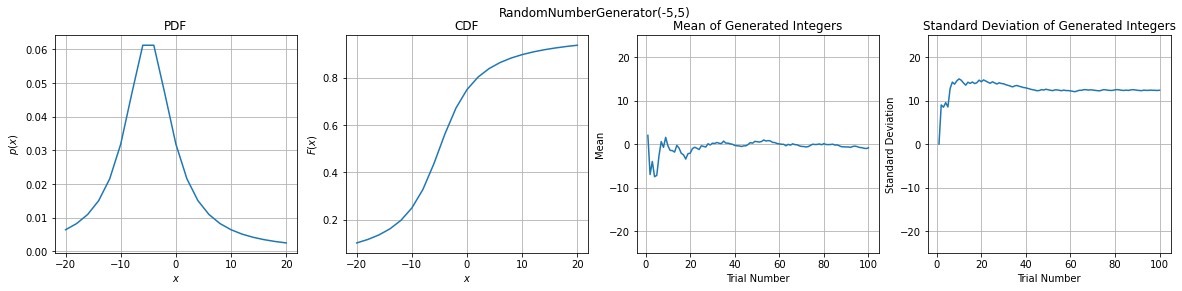

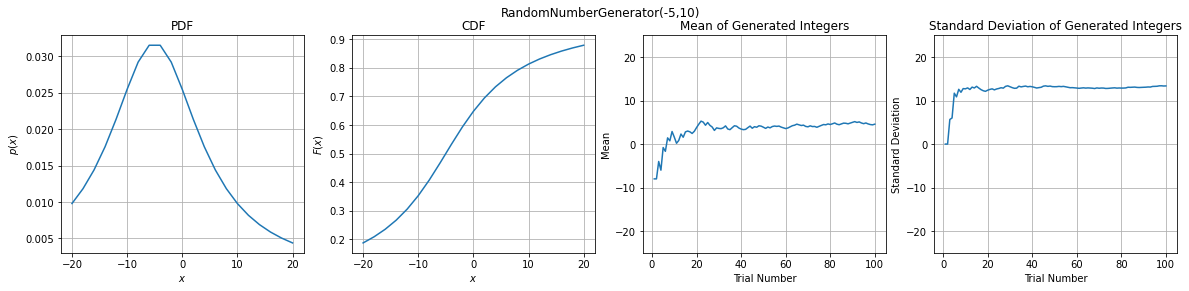

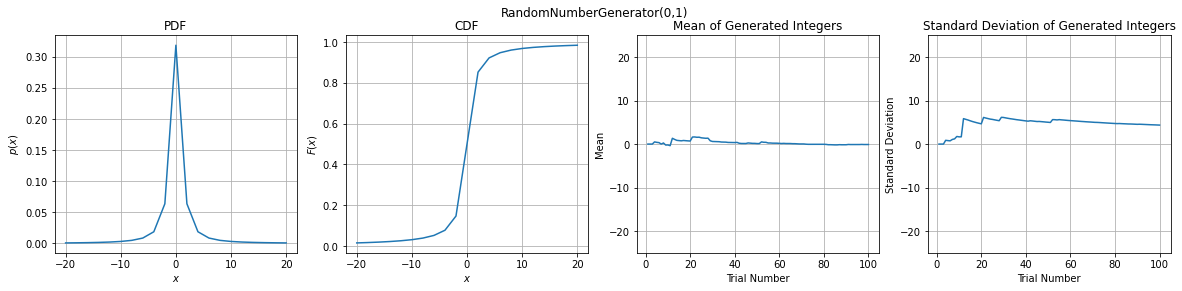

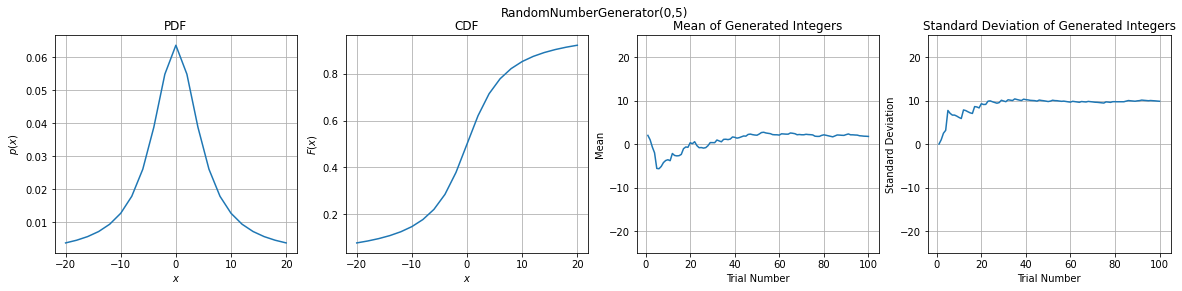

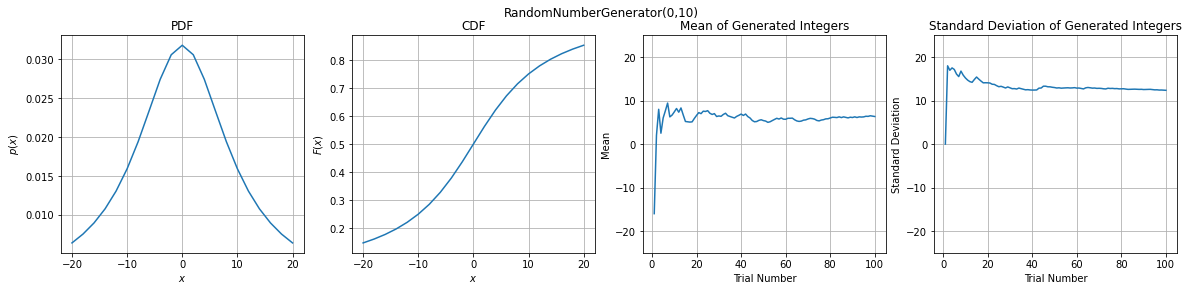

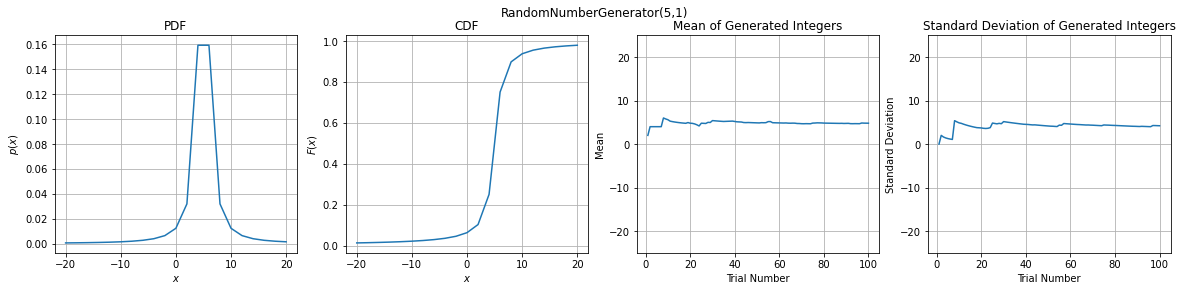

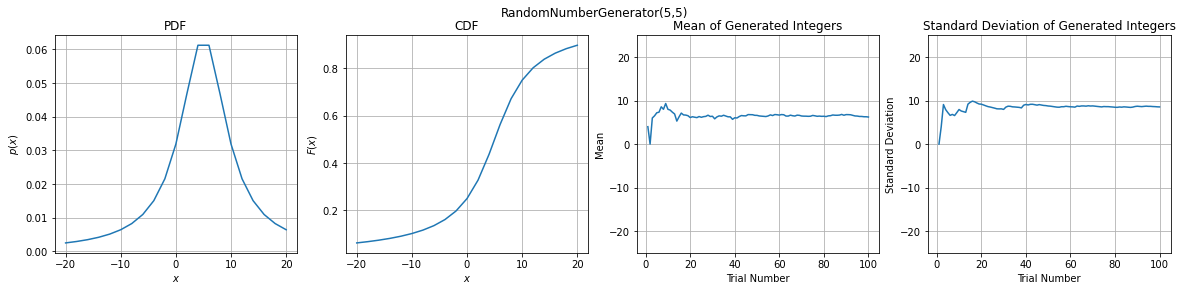

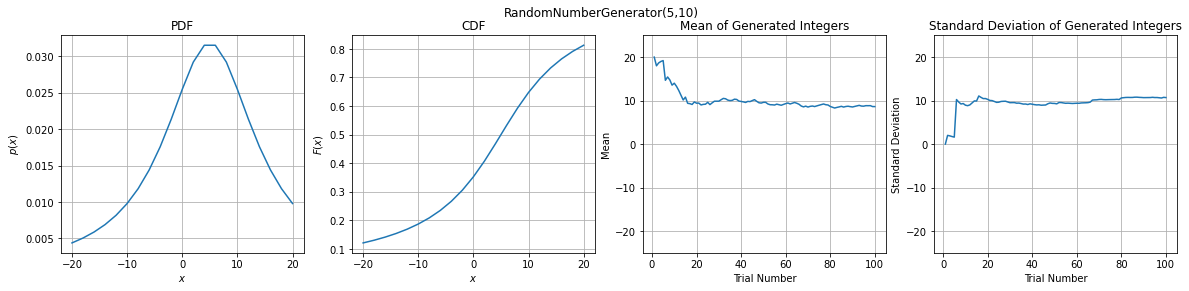

In [81]:
# Declare array for x0
x_list = [-5,0,5]
# Declare array for gammas
gamma_list = [1,5,10]
# Declare domain
domain = np.linspace(-20, 20, 21, dtype=np.int64)
# Iterate in x_list
for x in x_list:
    # Iterate in gamma_list
    for gm in gamma_list:
        # Create an object
        obj = RandomNumberGenerator(x,gm,domain)
        # Call randint function with created object and declare a list
        rand_ints = [obj.randint() for i in range(n_trials)]
        # Find mean of list
        mean = [np.mean(rand_ints[:i]) for i in range(1,n_trials+1)]
        # Find std of list
        std = [np.std(rand_ints[:i]) for i in range(1,n_trials+1)]
        # Call plot_part1 function with appropriate parameters
        plot_part1(obj.__str__(), obj.pdf(domain), obj.cdf(domain), mean,\
                   std, domain)

#### Comments [2pts]:
Comment about the graphs of mean and standard deviation of the generated integers. Can the mean and standard deviation be estimated? Explain.


When the number of trials (n_trials) is small, the mean and standard deviation variables show fluctuation, but as the number of trials (n_trials) increases, we see a stable graph. This shows that the mean and standard deviation can be estimated.

## Income Distribution [4pts]
Income distribution is one of the hot topics in economics area. It is simply a statistical measure of how many people earn or receive various amounts of income. Generally, the income distribution is not distributed equally and it can be observed from the studies.

In this part, an income distribution data is given. You will transform the given data using logarithm. 


* Your **Transform** class will be initialized with $base$.
* The class must have a **\_\_call\_\_** function that takes **data** and return the transformed version of data according to the logarithm with the given base. Please do not change the x return a new list etc.
* Plot the histograms of the original data and the transformed data. Plots must include labels, titles.
* Fit the data to an appropriate distribution. After that, plot the distribution over the histograms you obtained earlier. You can only use the given methods.

Plot the histograms with 2 different bases. Bases should include 10 and $e$. Your plots must have titles, labels and legends.

In [82]:
class Transform:
    # Initialized with 𝑏𝑎𝑠𝑒
    def __init__(self, base):
        self.base = base
        
    def __call__(self, x):
        # Find logarithm with given result
        result =  [np.log(a) / np.log(self.base) for a in x]
        # Return result
        return result

In [83]:
# Plot histograms
def plot_hist(data, transformed_data,base):
    # Set up the figure and axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the histogram of the original data
    ax1.hist(data, bins=20, alpha=0.5, label='Original data')
    ax1.set_xlabel('Data values')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Histogram of original data')
    ax1.legend()

    # Plot the histogram of the transformed data
    ax2.hist(transformed_data, bins=20, alpha=0.5, label='Transformed data')
    ax2.set_xlabel('Data values')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Histogram of transformed data (base={base})')
    ax2.legend()
    
    # Show the plots
    plt.show()

In [84]:
# Load csv
arr = np.loadtxt("income_distribution.csv",
                 delimiter=",", dtype=str,usecols=1)[1:]
# Convert elements to integer
arr = arr.astype(int)

In [85]:
# Create an object with base = 10
trs = Transform(10)
# Call function with created object
base_10 =trs.__call__(arr)

In [86]:
# Create an object with base = e
trs = Transform(np.exp(1))
# Call function with created object
base_e = trs.__call__(arr)

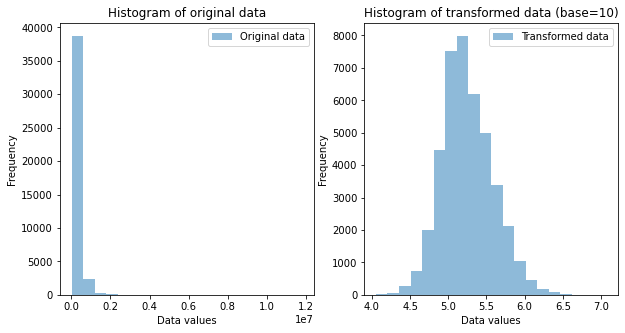

In [87]:
plot_hist(arr,base_10,10)

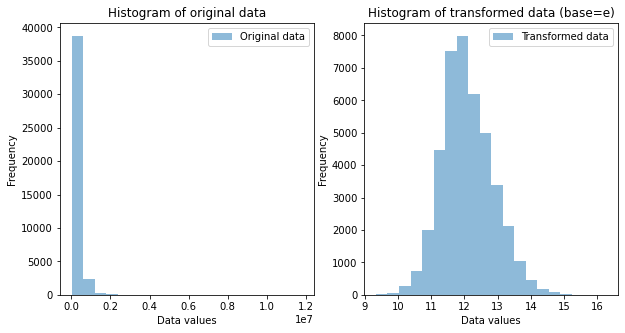

In [88]:
plot_hist(arr,base_e,"e")

#### Comments [4pts]:
* What is your observation on the given data and the transformed data?
* What changed on the data after the transformation? Explain.
* Explain the fitted distributions of the original and the transformed data.
* How is this transformation useful? Explain.


The distribution of the original data is very dense in a certain region. The transformed data has a Gaussian distribution. The distribution of the data changed with the transformation and became Gaussian. It cannot be said that the original data has a certain distribution, but the transformed data is Gaussian distributed. The benefit of the transformation is that it allows us to perform calculations related to the data by obtaining a Gaussian distribution.